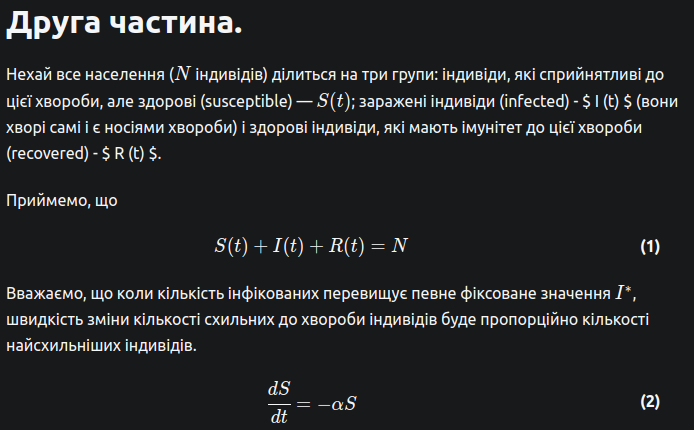
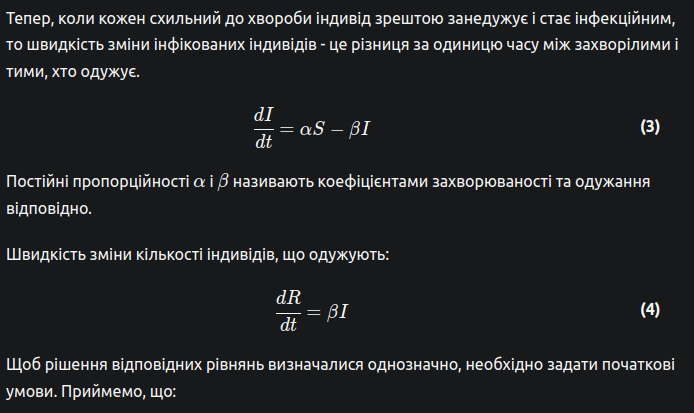
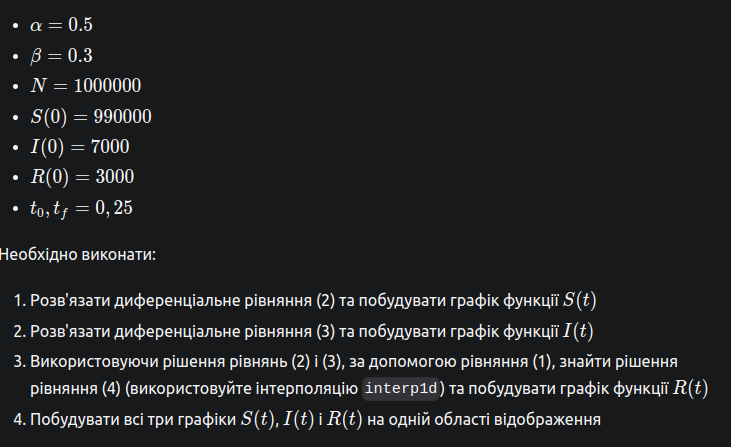

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.interpolate import interp1d    

In [2]:
A = 0.5
B = 0.3
N = 1000000
S0 = 990000
I0 = 7000
R0 = 3000
t0, tf = 0, 25

In [3]:
def dSdt(t, S):
  return -A * S

res = solve_ivp(dSdt, (t0, tf), [S0], dense_output=True)
res

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.149e-01 ...  2.415e+01  2.500e+01]
        y: [[ 9.900e+05  9.347e+05 ...  5.677e+00  3.713e+00]]
      sol: <scipy.integrate._ivp.common.OdeSolution object at 0x7fd6be62da80>
 t_events: None
 y_events: None
     nfev: 98
     njev: 0
      nlu: 0

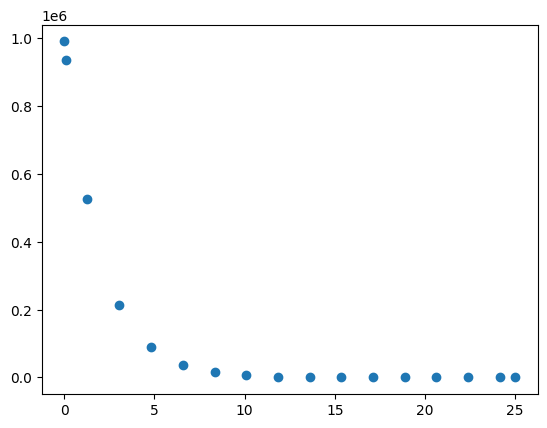

In [5]:
t, y = res.t, res.y[0]
plt.plot(t, y, 'o', label='res')

In [7]:
def dIdt(t, I):
  return A * res.sol(t) - B * I
    
res2 = solve_ivp(dIdt, (t0, tf), [I0], t_eval=res.t)
res2

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.149e-01 ...  2.415e+01  2.500e+01]
        y: [[ 7.000e+03  6.107e+04 ...  1.762e+03  1.368e+03]]
      sol: None
 t_events: None
 y_events: None
     nfev: 80
     njev: 0
      nlu: 0

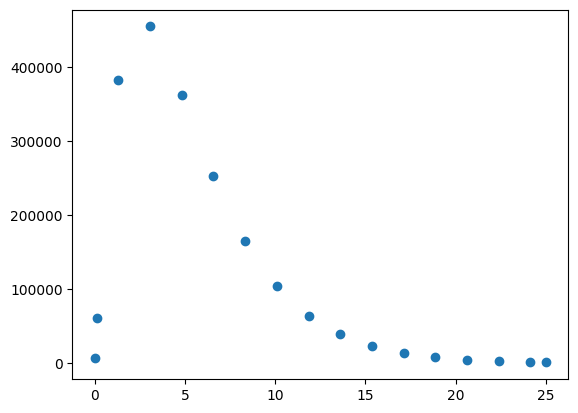

In [8]:
t, y = res2.t, res2.y[0]
plt.plot(t, y, 'o')

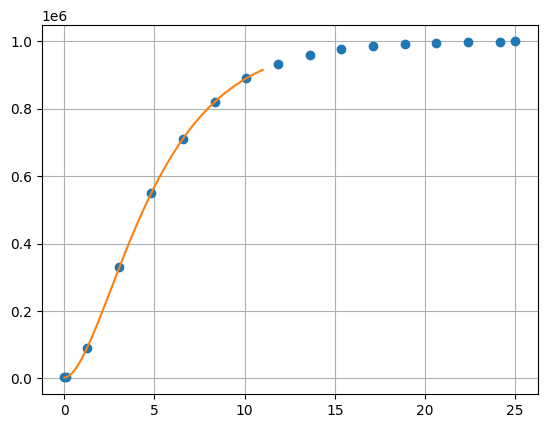

In [15]:
r = [N] * len(res.y[0]) - res.y[0] - res2.y[0]
t = res2.t
R = interp1d(t, r, kind='cubic')

plt.plot(t, r, 'o')
res3 = np.linspace(0, 11, 10000)
plt.plot(res3, R(res3))
plt.grid()

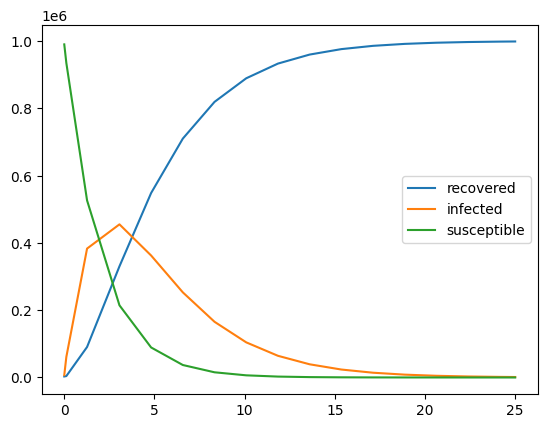

In [16]:
plt.plot(res2.t, r, res2.t, res2.y[0], res.t, res.y[0])
plt.legend(["recovered", "infected", "susceptible"])